# Solar power in a nuclear winter

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../src")
from analysis import GEM, waccmwind

Let's look at some maps for fun

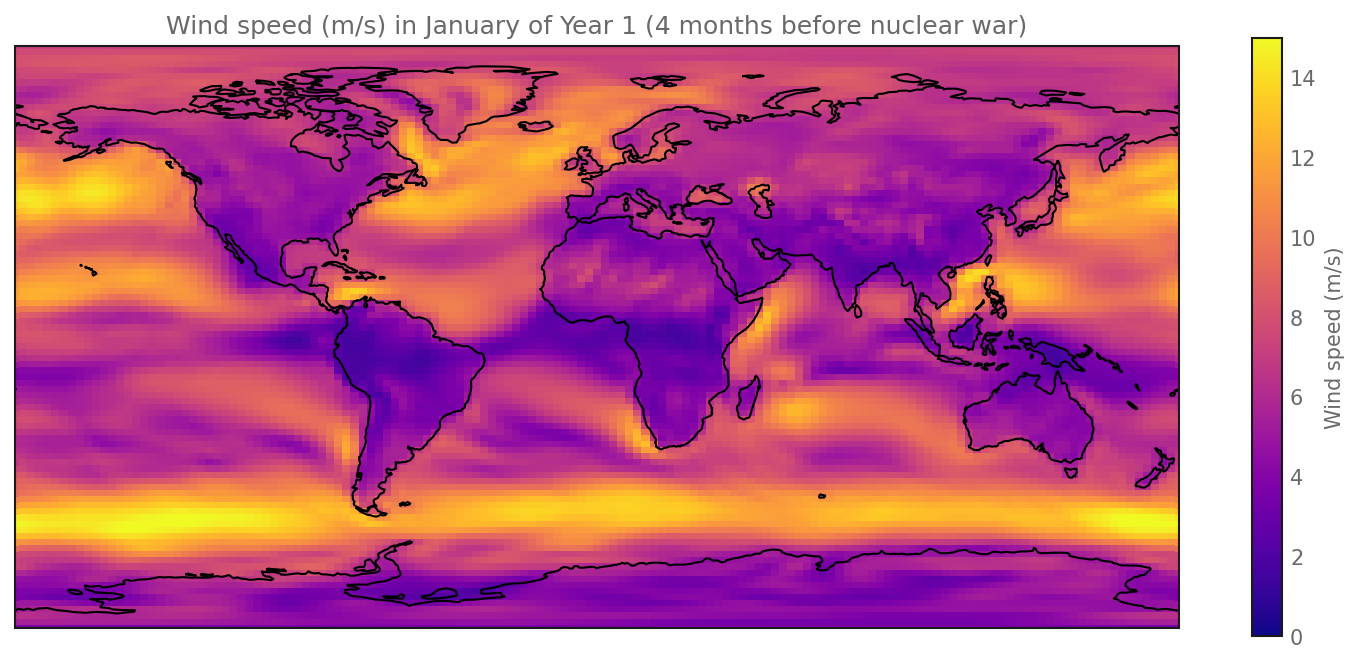

In [2]:
waccmwind.plot_map(year=1, month=1, sim="catastrophe", zmin=0, zmax=15, var="windspeed")

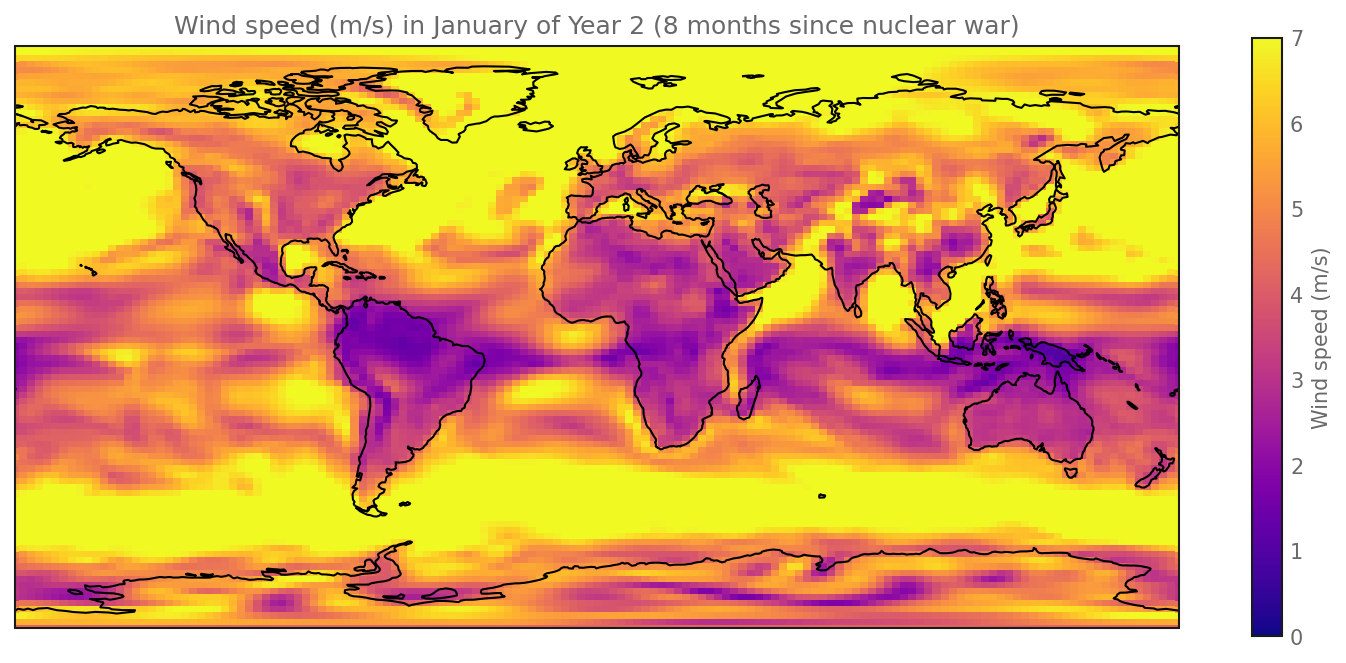

In [3]:
waccmwind.plot_map(year=2, month=1, sim="catastrophe", zmin=0, zmax=7, var="windspeed")

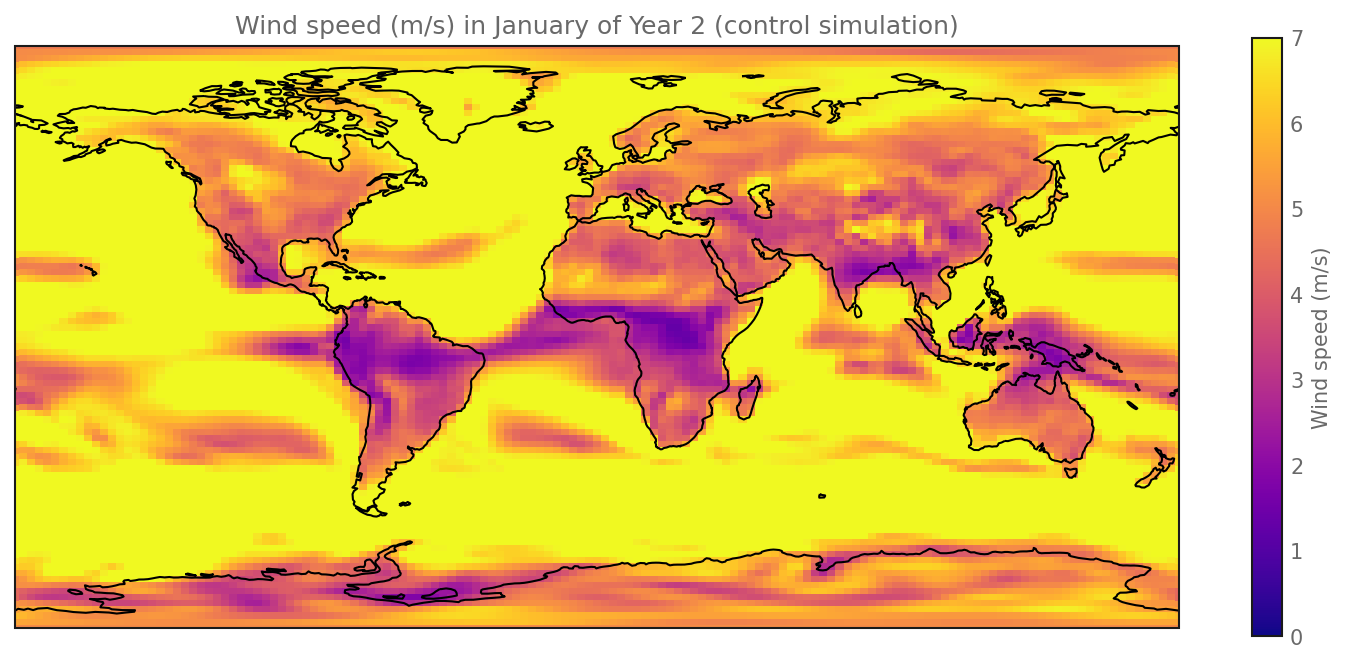

In [4]:
waccmwind.plot_map(year=2, month=1, sim="control", zmin=0, zmax=7, var="windspeed")

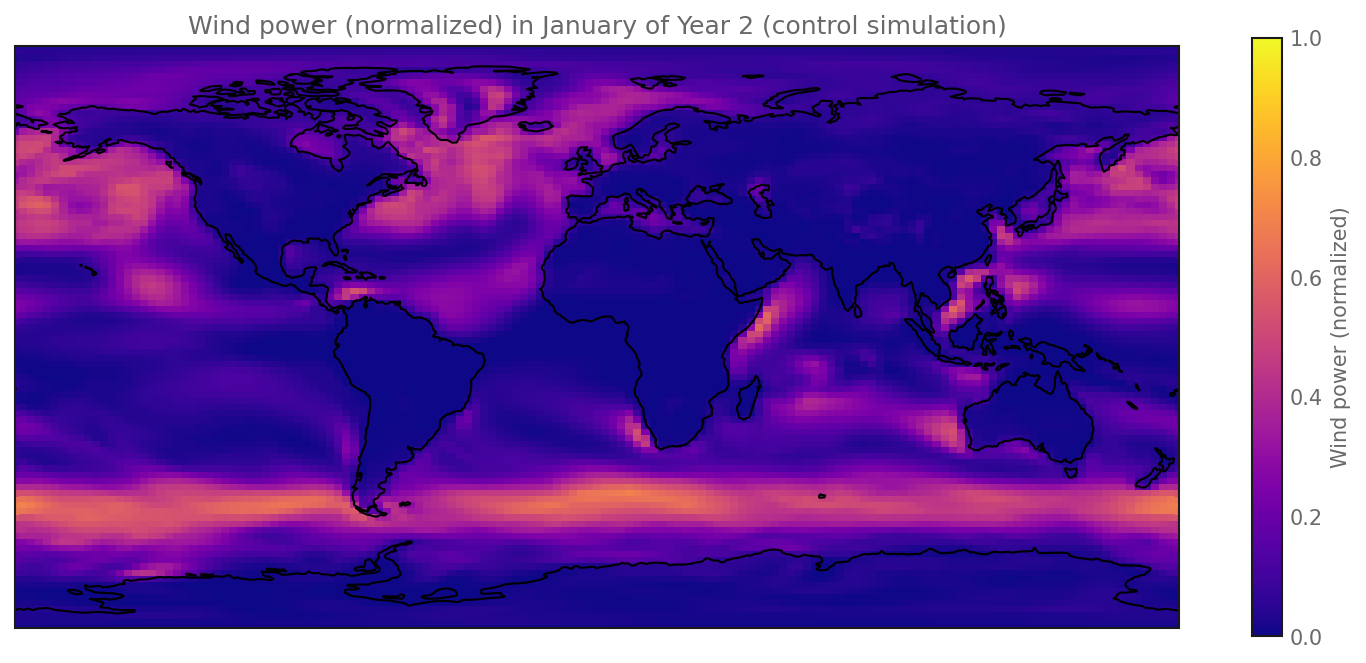

In [5]:
waccmwind.plot_map(year=2, month=1, sim="control", zmin=0, zmax=1, var="windpower")

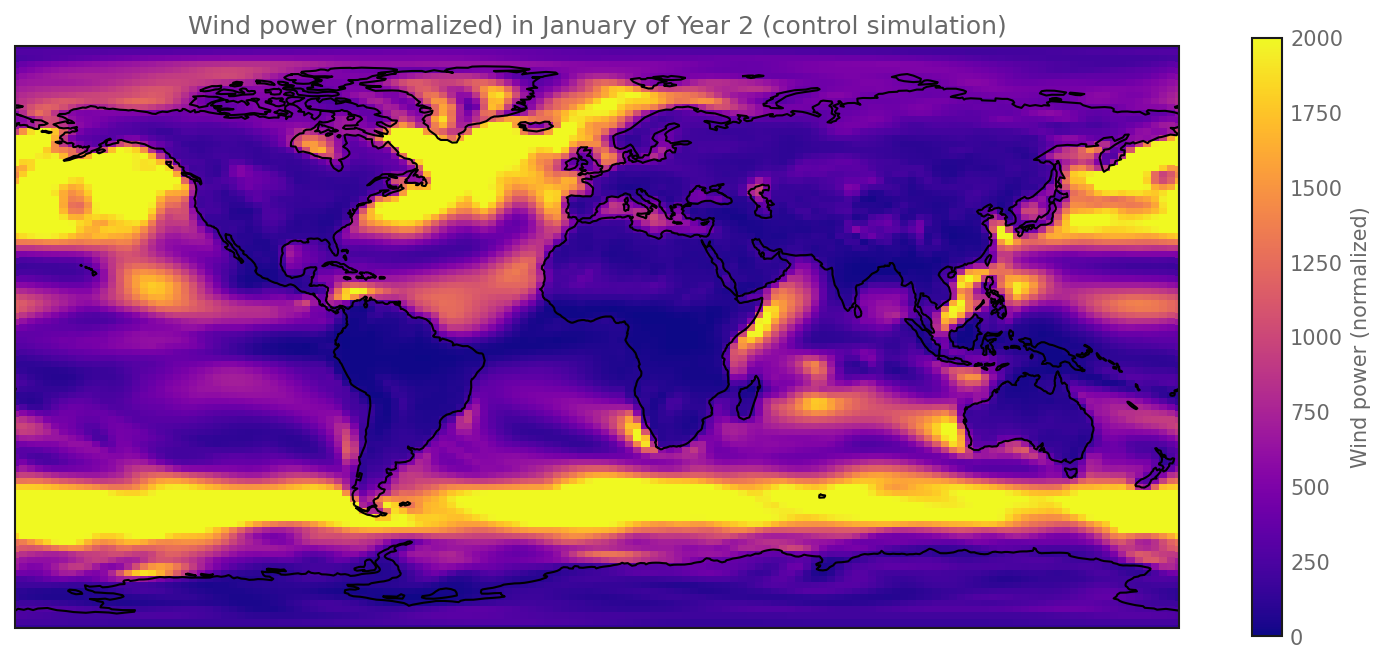

In [6]:
waccmwind.plot_map(year=2, month=1, sim="control", zmin=0, zmax=2000, var="windpower_simple")

We can clearly see the drop in wind speed after the onset of the nuclear winter.

Now let's take a look at the wind farm data.

In [7]:
gem = GEM()

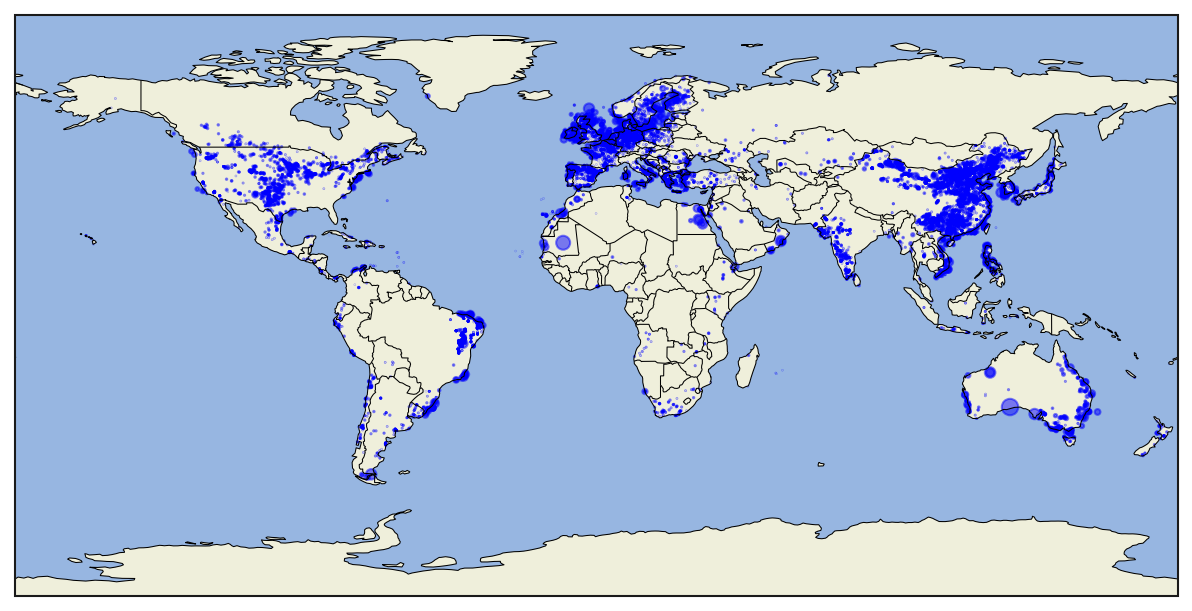

In [8]:
gem.plot_farm_map(energy="wind")

We make a quick check to make sure the data makes sense. I am comparing the total *operating* wind capacity to reference values below. It all looks ok.

In [9]:
gem.sum_operating_farms_per_country(energy="wind")

Country
China             342693.0
United States     144962.0
Germany            43875.0
India              35421.8
United Kingdom     28374.5
Name: Capacity (MW), dtype: float64

* China, 2021: 328 GW (https://en.wikipedia.org/wiki/Wind_power_in_China)
* US, 2022: 141 GW (https://en.wikipedia.org/wiki/Wind_power_in_the_United_States)
* Germany, 2021: 64 GW (https://en.wikipedia.org/wiki/Wind_power_in_Germany)
* India, 022, 42 GW (https://en.wikipedia.org/wiki/Wind_power_in_India)
* UK, 2022, 29 GW (https://en.wikipedia.org/wiki/Wind_power_in_the_United_Kingdom)

Let's test the capability of creating artifical farm locations for countries with missing farm location data.

In [10]:
df = gem.generate_random_locations("Malaysia", 50)
import folium
import pandas as pd

# Center the map on Malaysia
malaysia_center = [4.2105, 101.9758]
my_map = folium.Map(location=malaysia_center, zoom_start=7)

# Add markers
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Capacity: {row['Capacity (MW)']} MW"
    ).add_to(my_map)

# Save the map
my_map


/home/sblouin/ALLFED/Renewables-Nuclear-Winter/scripts/../src/analysis.py:228: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/home/sblouin/ALLFED/Renewables-Nuclear-Winter/scripts/../src/analysis.py:240: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


And now we do the *real* calculations. We query the climate model data for every wind farm in the database. That gives us a curve of the fraction of wind power accessible by that farm as a function of time during a nuclear winter. We then repeat this over all farms of a given country, to get the average change in wind power for that country (we weight each farm by its power capacity). Finally, we repeat this process for all countries. This is all written out in a csv file.

In [11]:
gem.get_all_country_time_series(energy="wind")

Processing Bhutan...


/home/sblouin/ALLFED/Renewables-Nuclear-Winter/scripts/../src/analysis.py:228: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/home/sblouin/ALLFED/Renewables-Nuclear-Winter/scripts/../src/analysis.py:240: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
100%|██████████| 100/100 [01:08<00:00,  1.45it/s]


Saved Bhutan to ../results/fraction_of_wind_power_countries.csv
Saved Bhutan to ../results/baseline_seasonality_wind_power_countries.csv


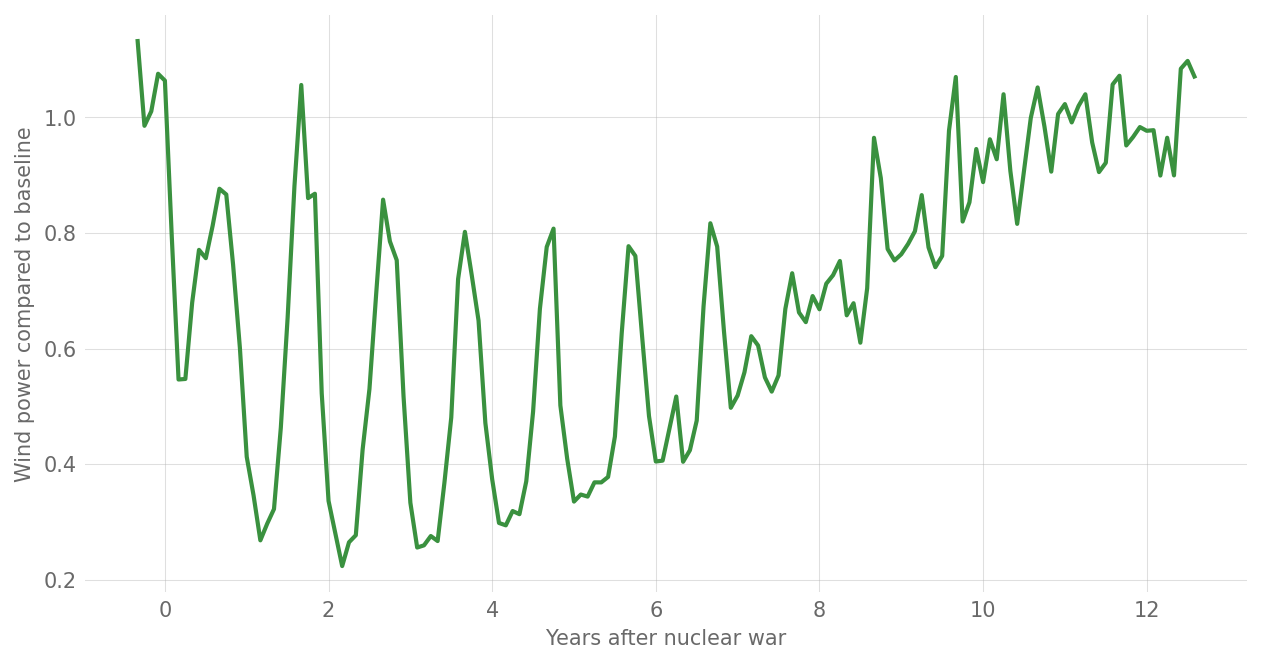

In [12]:
gem.postprocess_aggregate_countries(
    "../results/fraction_of_wind_power_countries.csv", energy="wind"
)

/home/sblouin/ALLFED/Renewables-Nuclear-Winter/scripts/../src/analysis.py:601: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/home/sblouin/ALLFED/Renewables-Nuclear-Winter/scripts/../src/analysis.py:601: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/home/sblouin/ALLFED/Renewables-Nuclear-Winter/scripts/../src/analysis.py:601: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.c

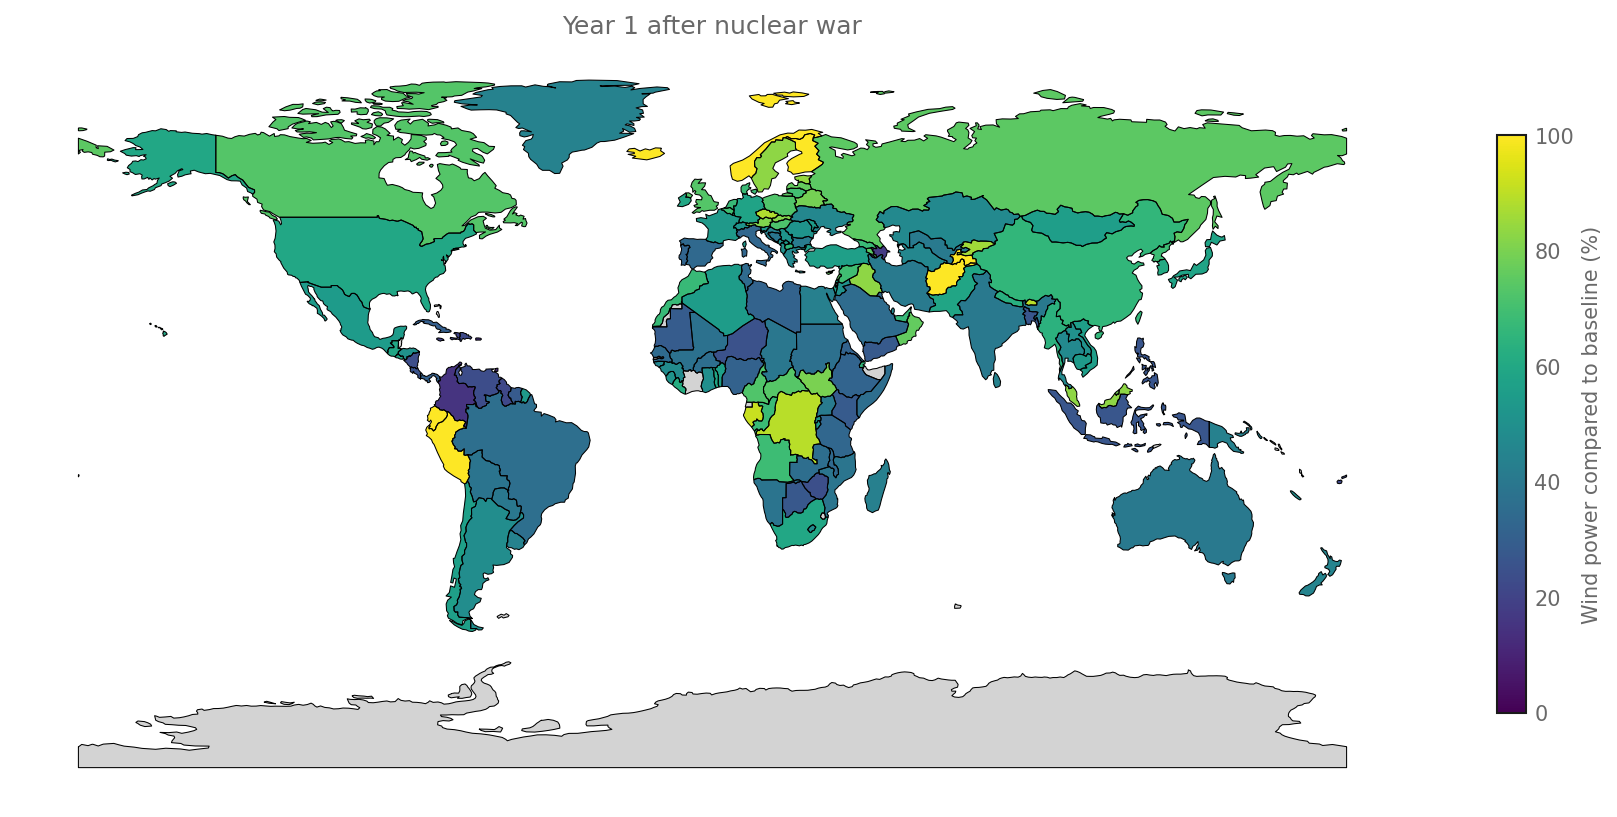

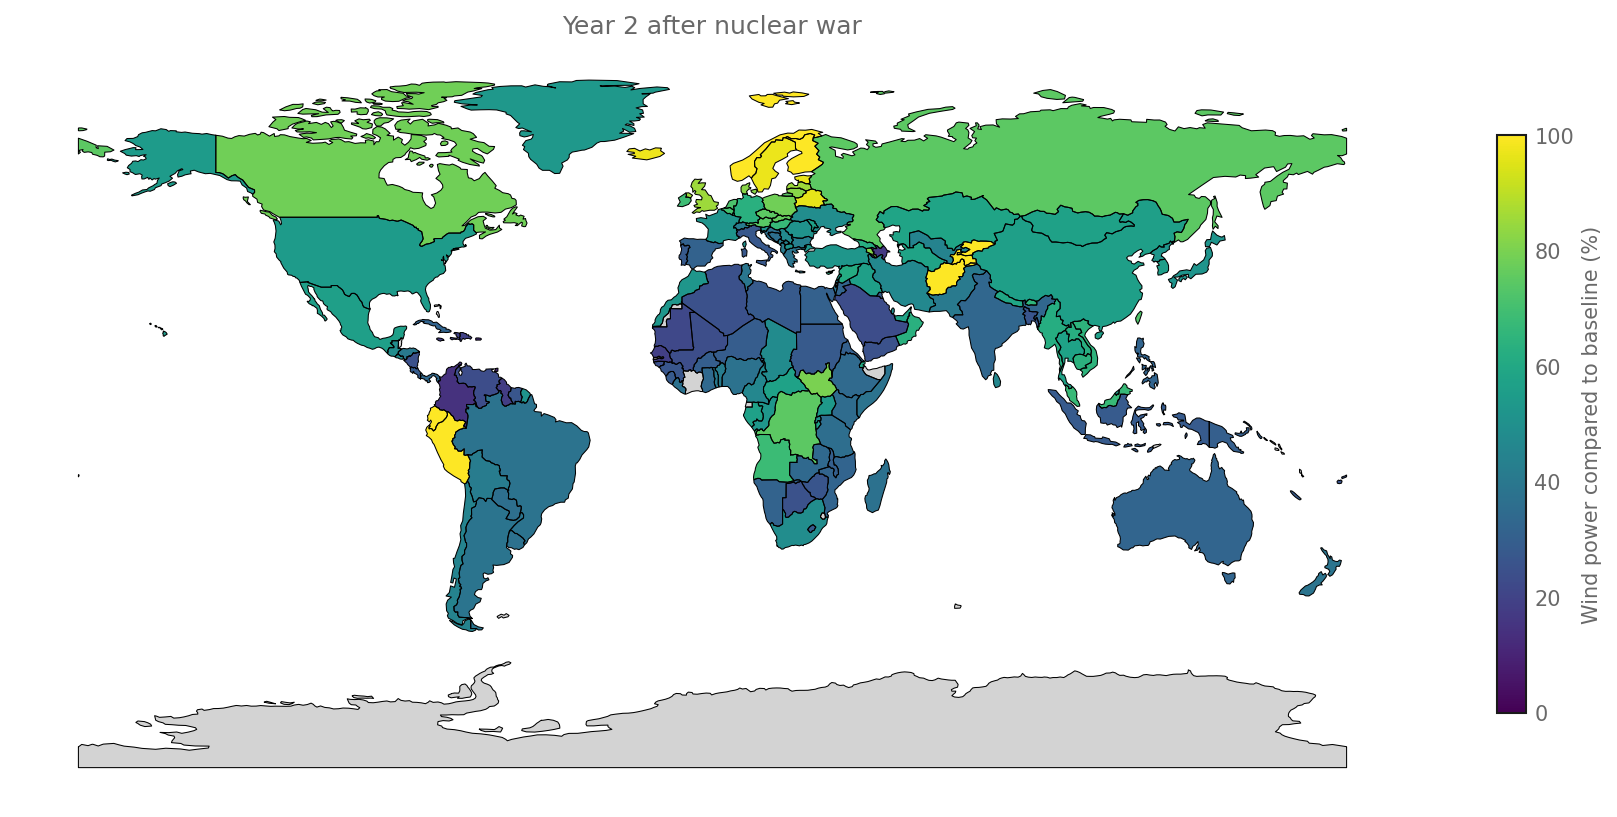

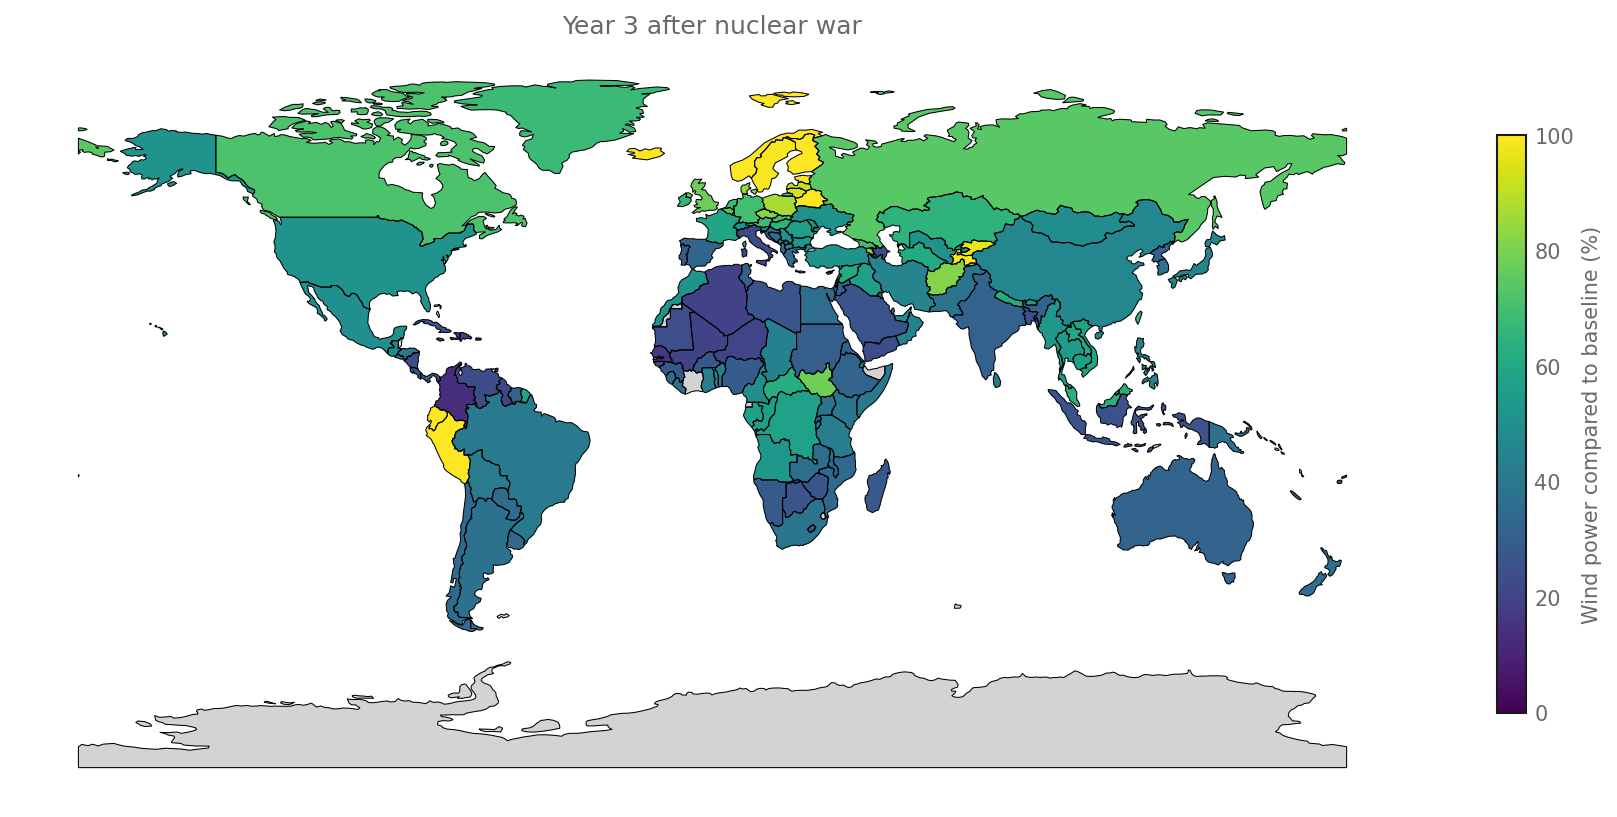

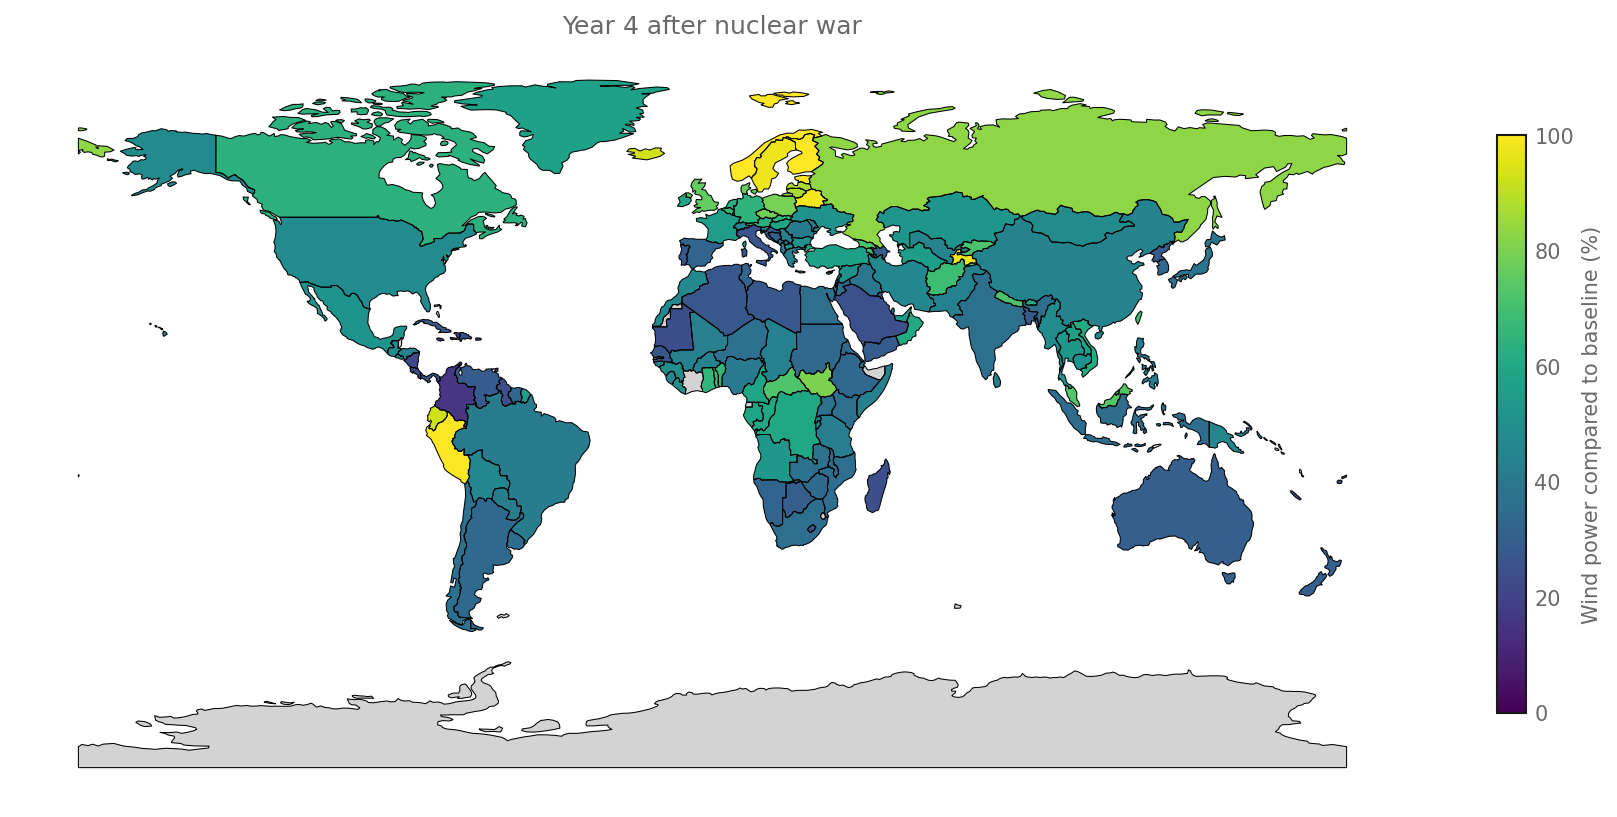

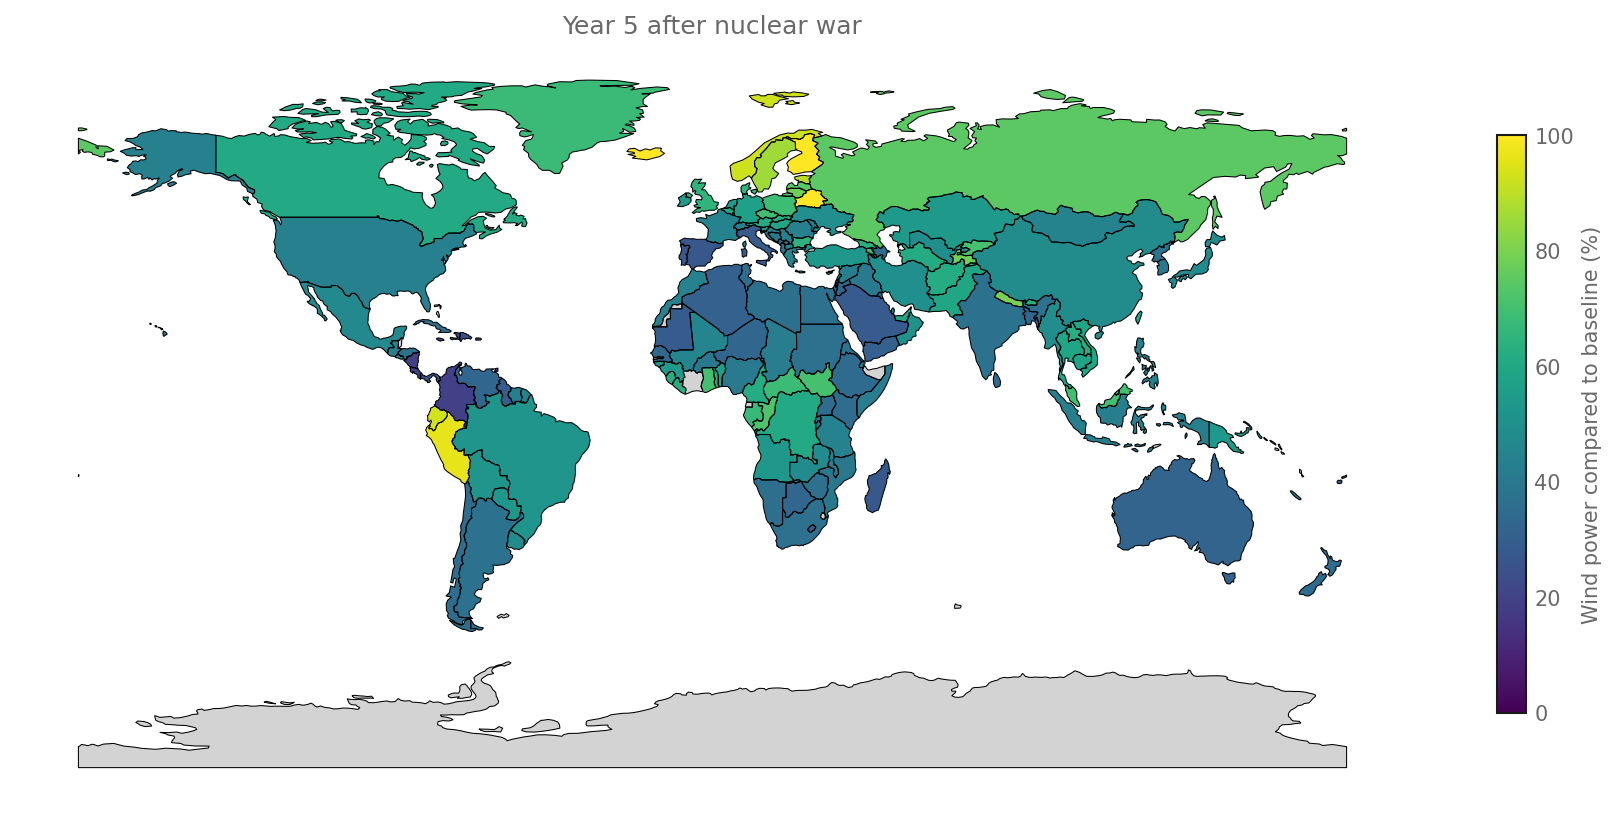

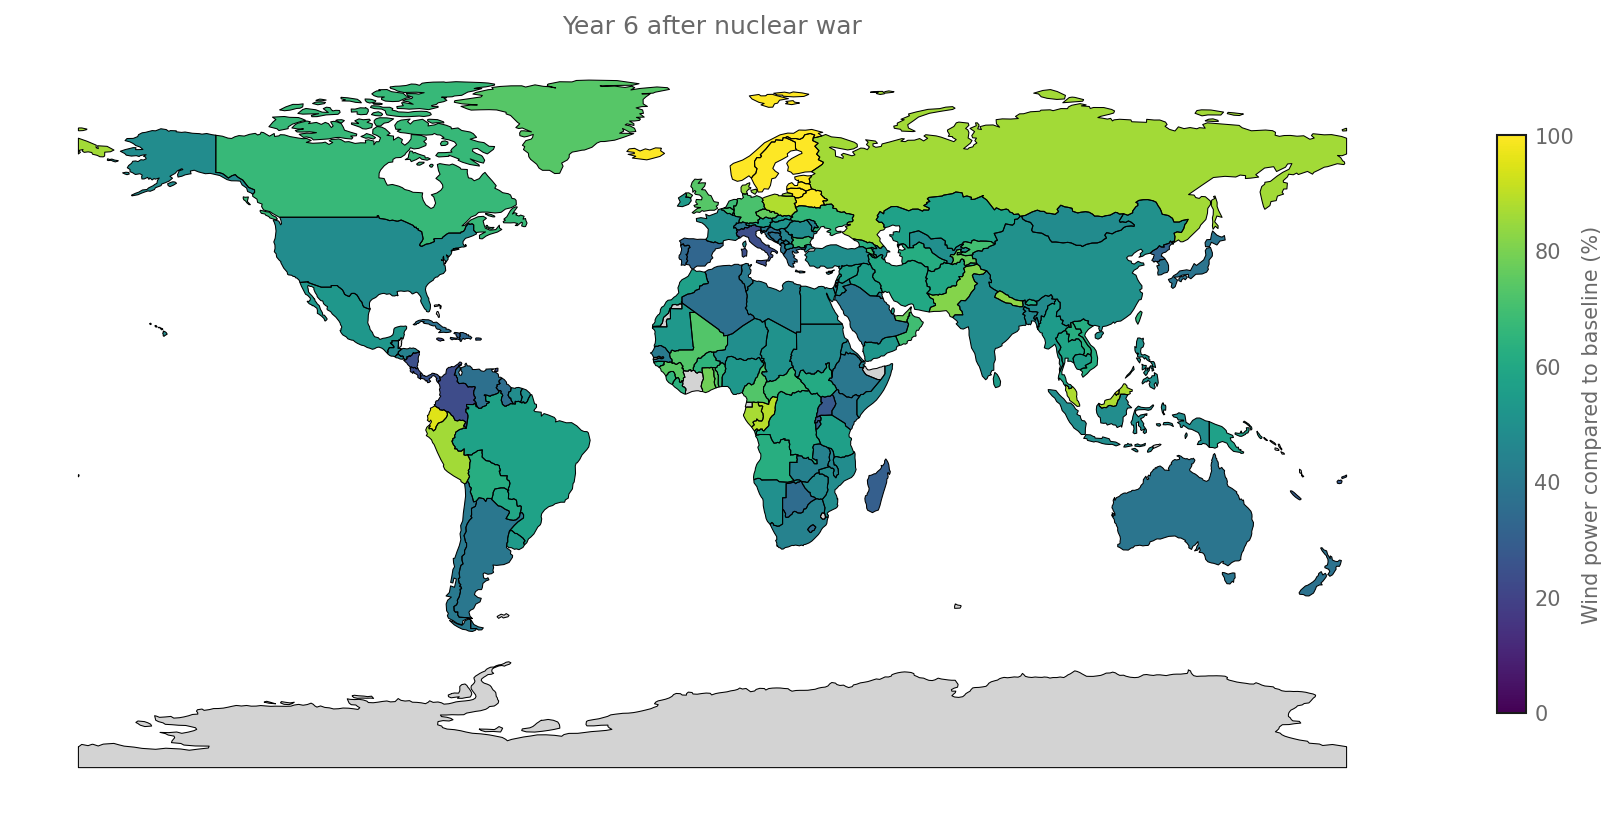

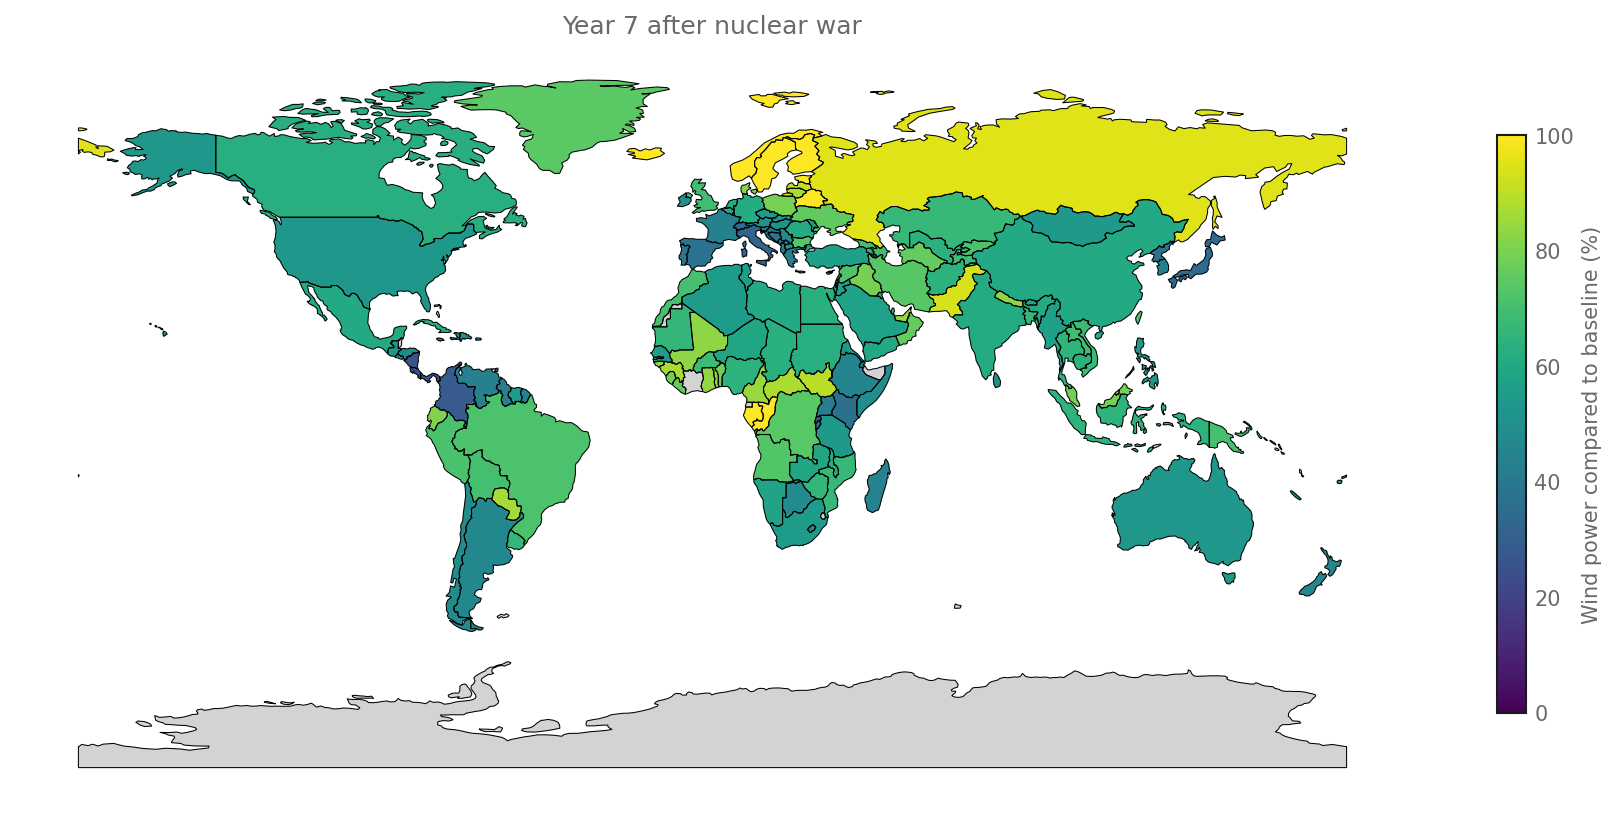

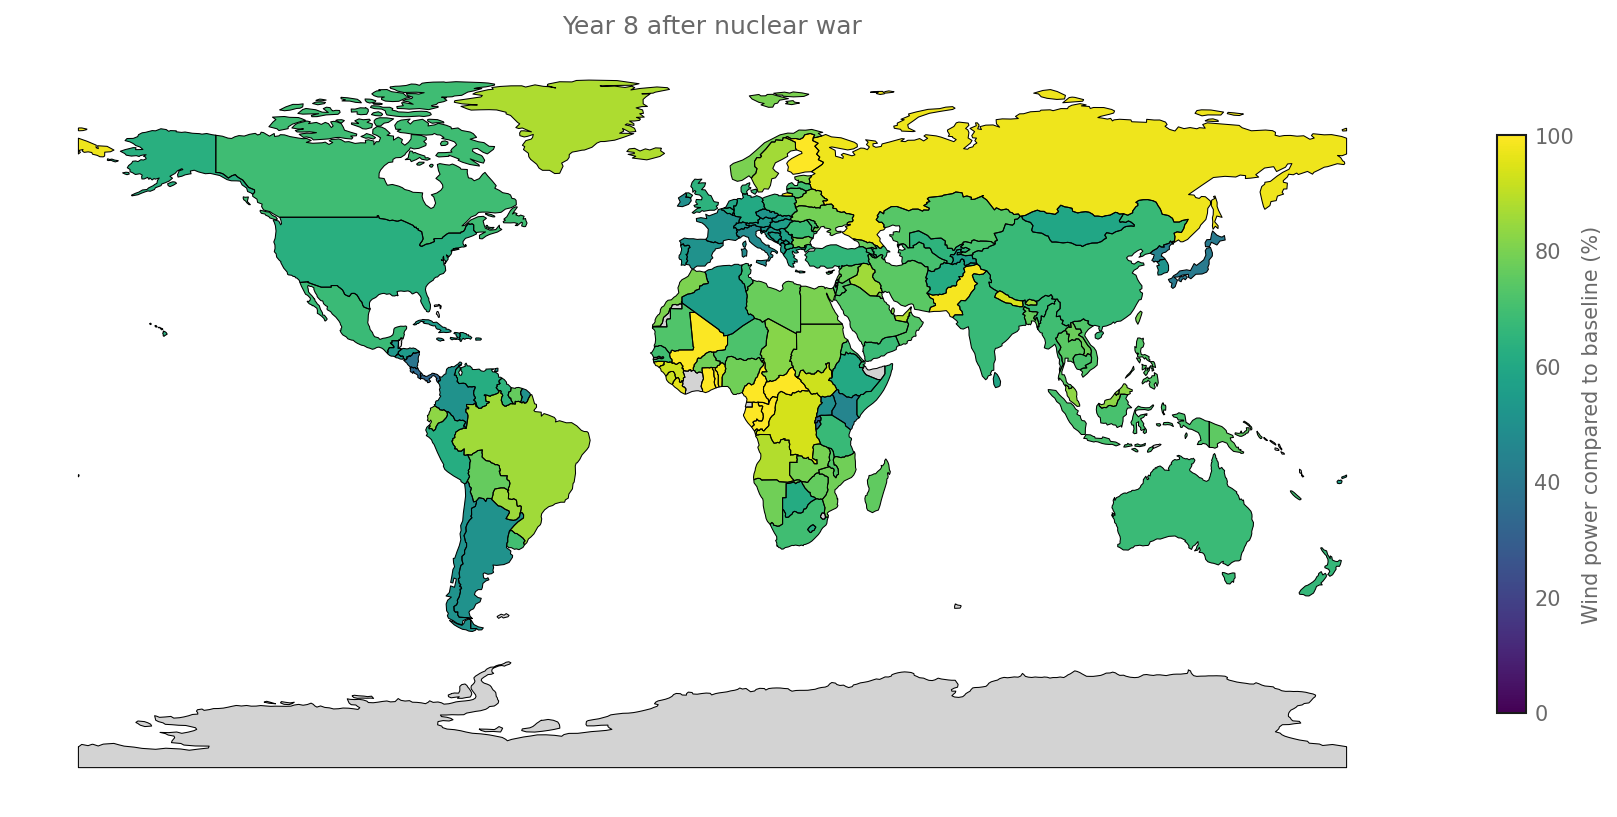

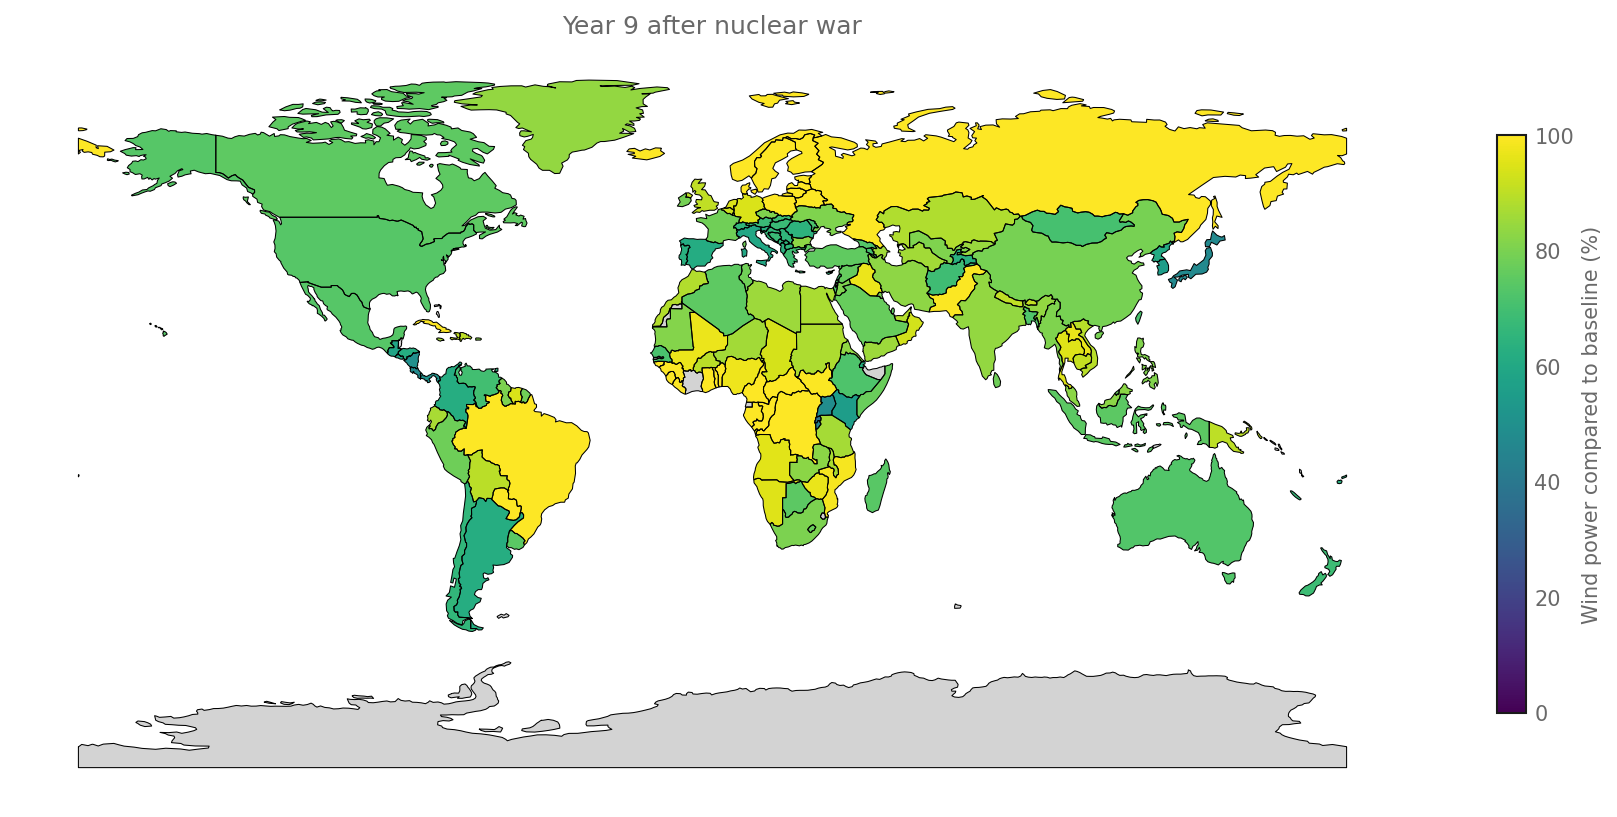

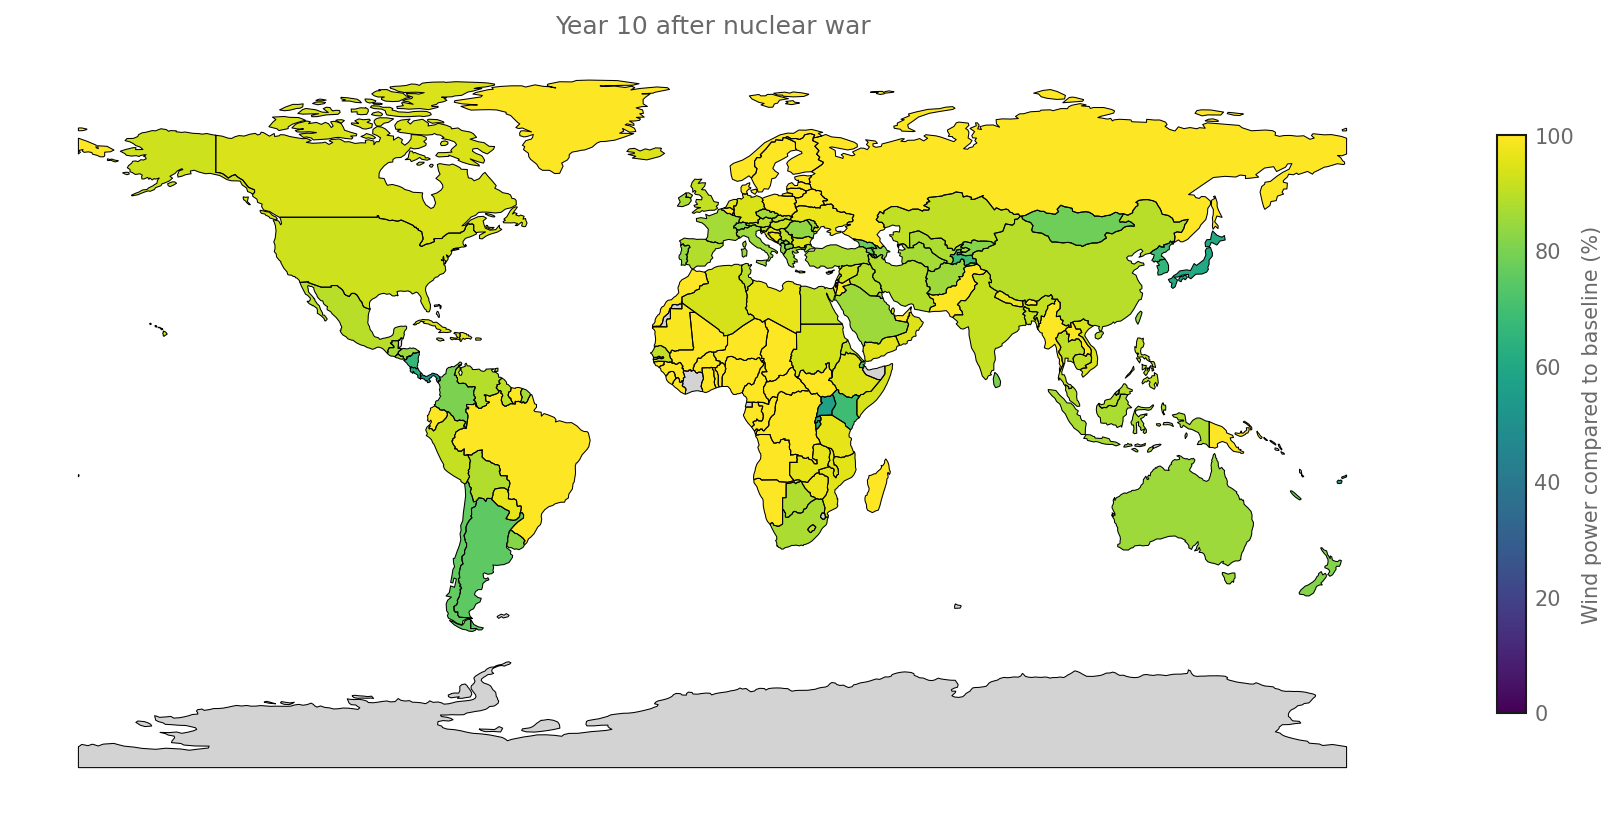

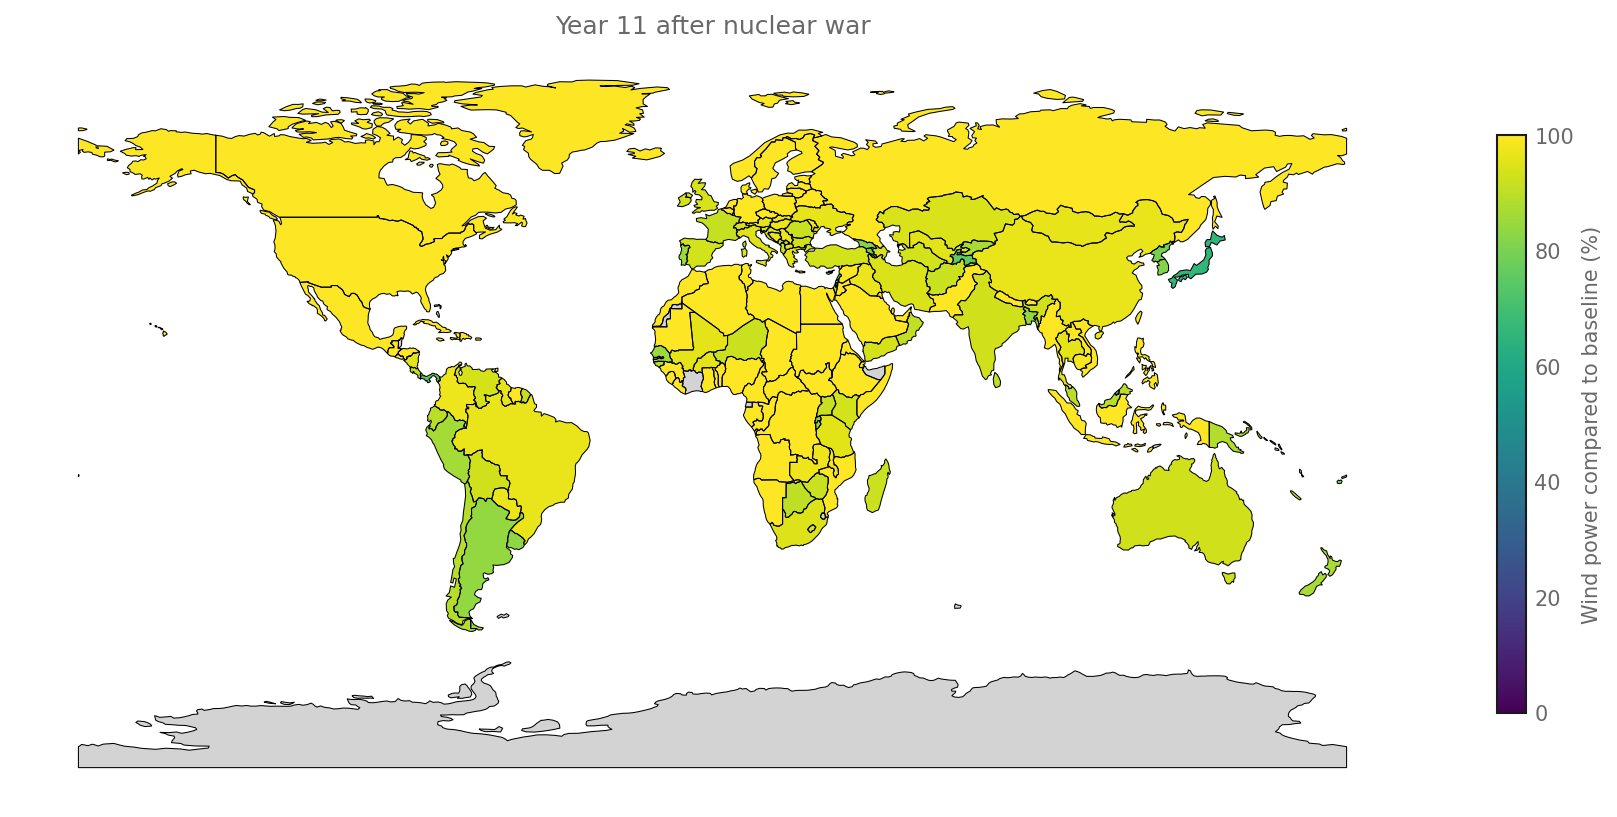

In [13]:
gem.postprocess_country_map(
    fraction_csv_file="../results/fraction_of_wind_power_countries.csv",
    baseline_csv_file="../results/baseline_seasonality_wind_power_countries.csv",
    energy="wind",
    zmin=0,
    zmax=100,
)

In [14]:
gem.postprocess_aggregate_yearly(
    fraction_csv="../results/fraction_of_wind_power_countries.csv",
    baseline_csv="../results/baseline_seasonality_wind_power_countries.csv",
    energy="wind",
)

/home/sblouin/ALLFED/Renewables-Nuclear-Winter/scripts/../src/analysis.py:517: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([new_df, new_row], ignore_index=True)
